In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

wkey = "45c89b215804cf8cdb8d60a266ddf95b"
from citipy import citipy


In [7]:
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_lngs = []
cities = []
city_lat = []
city_long = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
for lat_long in lat_lngs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_long[0])
        city_long.append(lat_long[1])

        # Print the city count to confirm sufficient count
print("There are:", len(cities), "cities")
print("There are:", len(city_lat), "lats")
print("There are:", len(city_long), "longs")

There are: 604 cities
There are: 604 lats
There are: 604 longs


In [9]:
temp_dict ={
    "City" : cities,
    "Lat" : city_lat,
    "Lng" : city_long,
    "Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "Country":"",
    "Date":""}

tempDict = pd.DataFrame(temp_dict)
tempDict.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,81.726506,119.136425,,,,,,
1,avarua,-52.973388,-167.318429,,,,,,
2,kapaa,33.879583,-166.300886,,,,,,
3,albany,-76.179644,116.036200,,,,,,
4,bud,74.611104,1.533752,,,,,,


In [10]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wkey + "&q="




city_number = 0
noinfo = 0

for index, row in tempDict.iterrows():
    city = row['City']
    
    response = requests.get(url + city).json()
    
    try:
        
        tempDict.loc[index, 'Temp'] = response['main']['temp']
        tempDict.loc[index, 'Humidity'] = response['main']['humidity']
        tempDict.loc[index, 'Cloudiness'] = response['clouds']['all']
        tempDict.loc[index, 'Wind Speed'] = response['wind']['speed']
        tempDict.loc[index, 'City ID'] = response['id']
        tempDict.loc[index, 'Country'] = response['sys']['country']
        tempDict.loc[index, 'Date'] = response["dt"]
        city_number +=1
        print(f"City Number: {city_number} - City Name: {city}")
    except KeyError:
        
        noinfo +=1
        continue

print("---------------------------------")
print(f"There are {city_number} cities that DO have info")
print(f"there are {noinfo} cities that DO NOT have any info")
print("----------------------------------")

City Number: 1 - City Name: saskylakh
City Number: 2 - City Name: avarua
City Number: 3 - City Name: kapaa
City Number: 4 - City Name: albany
City Number: 5 - City Name: bud
City Number: 6 - City Name: haines junction
City Number: 7 - City Name: rundu
City Number: 8 - City Name: bilma
City Number: 9 - City Name: tabou
City Number: 10 - City Name: gizo
City Number: 11 - City Name: henties bay
City Number: 12 - City Name: mount isa
City Number: 13 - City Name: rikitea
City Number: 14 - City Name: eureka
City Number: 15 - City Name: punta arenas
City Number: 16 - City Name: hilo
City Number: 17 - City Name: quiruvilca
City Number: 18 - City Name: shebunino
City Number: 19 - City Name: khatanga
City Number: 20 - City Name: cherskiy
City Number: 21 - City Name: san lawrenz
City Number: 22 - City Name: batticaloa
City Number: 23 - City Name: port hedland
City Number: 24 - City Name: weyburn
City Number: 25 - City Name: jamestown
City Number: 26 - City Name: opuwo
City Number: 27 - City Name:

City Number: 213 - City Name: kendal
City Number: 214 - City Name: muisne
City Number: 215 - City Name: umm kaddadah
City Number: 216 - City Name: elizabeth city
City Number: 217 - City Name: dharchula
City Number: 218 - City Name: nieves
City Number: 219 - City Name: lillooet
City Number: 220 - City Name: leningradskiy
City Number: 221 - City Name: sukhaya buyvola
City Number: 222 - City Name: georgetown
City Number: 223 - City Name: vrangel
City Number: 224 - City Name: sosnovo
City Number: 225 - City Name: lebu
City Number: 226 - City Name: victoria
City Number: 227 - City Name: praia da vitoria
City Number: 228 - City Name: shache
City Number: 229 - City Name: motema
City Number: 230 - City Name: nemuro
City Number: 231 - City Name: velingara
City Number: 232 - City Name: atambua
City Number: 233 - City Name: whitehorse
City Number: 234 - City Name: kiunga
City Number: 235 - City Name: bozoum
City Number: 236 - City Name: laguna
City Number: 237 - City Name: shurugwi
City Number: 2

City Number: 422 - City Name: bykovo
City Number: 423 - City Name: baoning
City Number: 424 - City Name: mahibadhoo
City Number: 425 - City Name: dargaville
City Number: 426 - City Name: axim
City Number: 427 - City Name: shimoda
City Number: 428 - City Name: takoradi
City Number: 429 - City Name: batavia
City Number: 430 - City Name: luba
City Number: 431 - City Name: gillette
City Number: 432 - City Name: dalbandin
City Number: 433 - City Name: nea alikarnassos
City Number: 434 - City Name: salym
City Number: 435 - City Name: sao filipe
City Number: 436 - City Name: grindavik
City Number: 437 - City Name: damavand
City Number: 438 - City Name: hearst
City Number: 439 - City Name: atuntaqui
City Number: 440 - City Name: egvekinot
City Number: 441 - City Name: manado
City Number: 442 - City Name: lucapa
City Number: 443 - City Name: taiyuan
City Number: 444 - City Name: adre
City Number: 445 - City Name: marsa matruh
City Number: 446 - City Name: tanout
City Number: 447 - City Name: an

In [11]:
ts = pd.to_datetime(datetime.now())
tempDict['Temp'].replace('',np.nan, inplace=True)

Complete_WeatherDF = tempDict.dropna(subset=['Temp'])

print(f"The original tempDict Data Frame's shape is: {tempDict.shape}")
print(f"The new DataFrame including only valid cities with temperatures shape is: {Complete_WeatherDF.shape}")
print(f"There were {noinfo} cities in the original tempDict Data Frame that did not have any info.")
Complete_WeatherDF.head()

The original tempDict Data Frame's shape is: (604, 10)
The new DataFrame including only valid cities with temperatures shape is: (543, 10)
There were 61 cities in the original tempDict Data Frame that did not have any info.


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
0,saskylakh,81.726506,119.136425,47.52,88,96,5.23,RU,1562507721,2017155.0
1,avarua,-52.973388,-167.318429,71.60,64,87,10.29,CK,1562507721,4035715.0
2,kapaa,33.879583,-166.300886,77.90,78,75,12.75,US,1562507460,5848280.0
3,albany,-76.179644,116.036200,70.09,60,1,6.93,US,1562507671,5106834.0
4,bud,74.611104,1.533752,56.53,71,75,10.29,NO,1562507721,7626370.0


In [12]:
Complete_WeatherDF.to_csv('Complete_WeatherDF.csv')

tempDict.to_csv('tempDict_DF.csv')

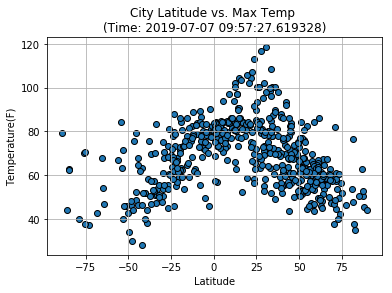

In [13]:
y = Complete_WeatherDF.Temp
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temp \n(Time: {ts})")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid(True)
plt.savefig('WeatherPy_Temp.vs.Lat.png')
plt.show()

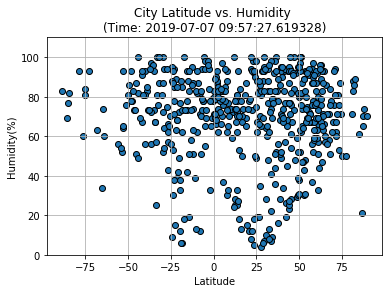

In [14]:
y = Complete_WeatherDF.Humidity
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o', edgecolors='black')
plt.title(f'City Latitude vs. Humidity \n(Time: {ts})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
### Note for ylim - I added the ylim because sometimes a city would pull back a humidity percentage that was greater than
### 100% and it would distort the visualization...
plt.ylim(0,110)
plt.grid(True)
plt.savefig('WeatherPy_Humidity.vs.Lat.png')
plt.show()

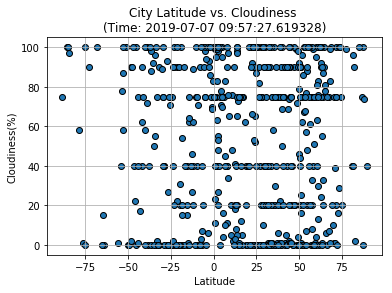

In [15]:
y = Complete_WeatherDF.Cloudiness
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o', edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness \n(Time: {ts})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
plt.savefig('WeatherPy_Cloudiness.vs.Lat.png')
plt.show()

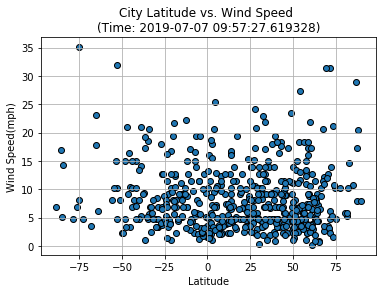

In [16]:
y = Complete_WeatherDF['Wind Speed']
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o', edgecolors='black')
plt.title(f'City Latitude vs. Wind Speed \n(Time: {ts})')
plt.xlabel('Latitude')
plt.grid(True)
plt.ylabel('Wind Speed(mph)')
plt.savefig('WeatherPy_WindSpeed.vs.Lat.png')
plt.show()
